In [24]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pydataset import data



#Use the iris database to answer the following quesitons:

In [25]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [27]:
iris = sns.load_dataset('iris') #to import directly from sns dataset

In [4]:
# Or load using pydataset:
#      tips = data('tips')
#      data('tips', show_doc = True)

In [28]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [29]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [30]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


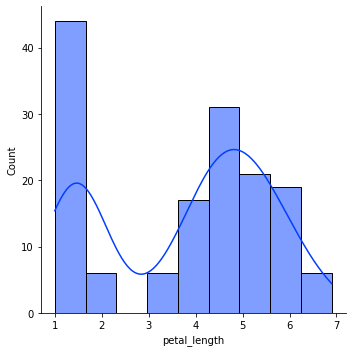

In [95]:
# 1) What does the distribution of petal lengths look like?

#sns.displot(data = iris, x = 'petal_length')

sns.displot(data = iris, 
            x = 'petal_length', 
            kde = True)


#sns.displot(data = iris, 
#            x = 'petal_length',
#           hue = 'species')

#sns.histplot(data = iris,
#            x = 'petal_length',
#            y = 'petal_width', 
#           hue = 'species')

#sns.histplot(data = iris,
#           x = 'petal_length',
#          y = 'species')

#sns.displot(data = iris,
#           x = 'petal_length',
#           hue = 'species',
#           multiple = 'stack')

In [31]:
# Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ 
# as a hint to how we could visually determine if a correlation exists between two numeric columns.

iris.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


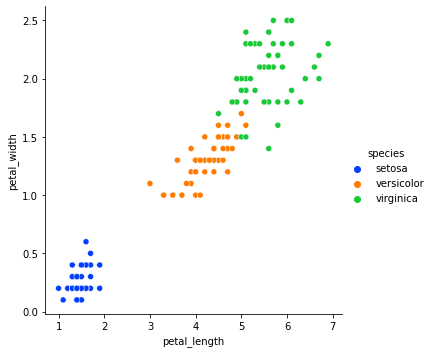

In [74]:
sns.relplot(data = iris, x = 'petal_length', y = 'petal_width', hue = 'species')

<AxesSubplot:>

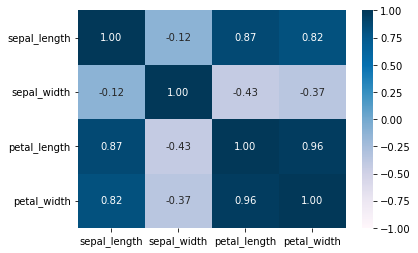

In [32]:
sns.heatmap(iris.corr(), annot = True,
            fmt = '0.2f',
            cmap = 'PuBu',
            center = 0,
            vmin = -1,
            linecolor = 'k')
            

In [33]:
# --- yes, there is a correlation postive correlation between petal length and petal width.

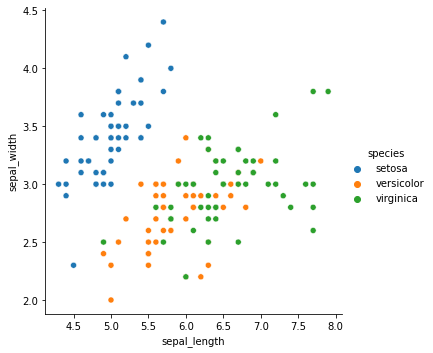

In [34]:
# Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize 
# two numeric columns through the lense of a categorical column.

#### it is not clear for veriscolor and virginica, because the data overlaps frequently. 

#sns.catplot(data = iris,
#           x = 'sepal_width',
#           y = 'sepal_length',
#           hue = 'species')

#sns.catplot(data = iris,
#           x = 'sepal_width',
#           y = 'sepal_length',
#           kind = 'bar')

sns.relplot(data = iris,
           x = 'sepal_length',
           y = 'sepal_width',
           hue = 'species')

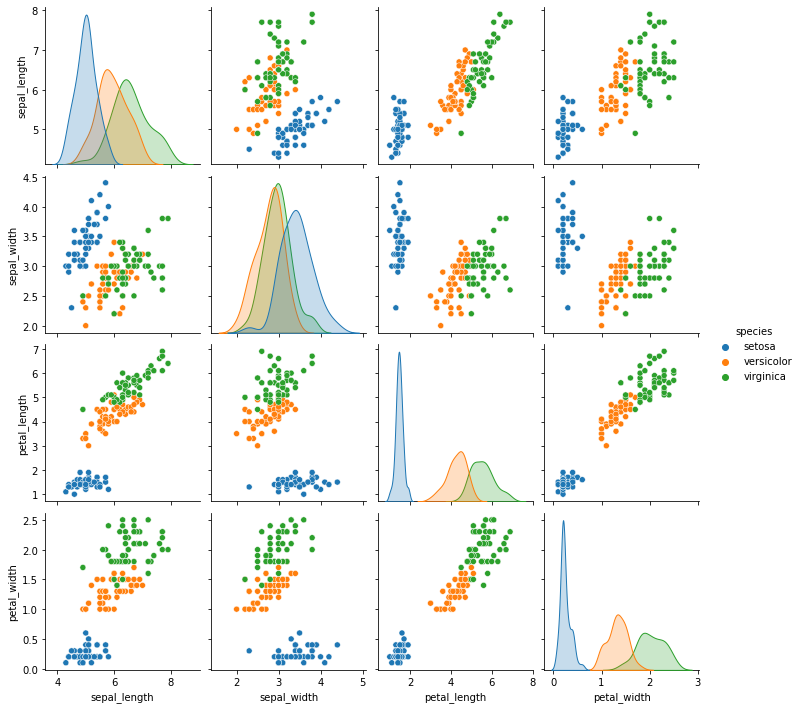

In [35]:
# 4) Which features would be best used to predict species? 

# ---petal_width and petal_length are the most predictive of the species

sns.pairplot(data = iris, hue = 'species')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

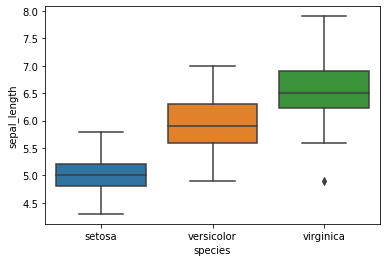

In [37]:
sns.boxplot(data = iris, x = 'species', y = 'sepal_length')

---

In [38]:
#1)Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. 

anscombe = sns.load_dataset('anscombe')

In [39]:
# 1a) Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. 
# What do you notice? --- mean, median, and std are all very similar or the same
anscombe.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [80]:
#from review

anscombe.groupby('dataset')[['x', 'y']].agg(['mean', 'median', 'std'])

x                          y                 
        mean median       std      mean median       std
dataset                                                 
I        9.0    9.0  3.316625  7.500909   7.58  2.031568
II       9.0    9.0  3.316625  7.500909   8.14  2.031657
III      9.0    9.0  3.316625  7.500000   7.11  2.030424
IV       9.0    8.0  3.316625  7.500909   7.04  2.030579

In [40]:
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


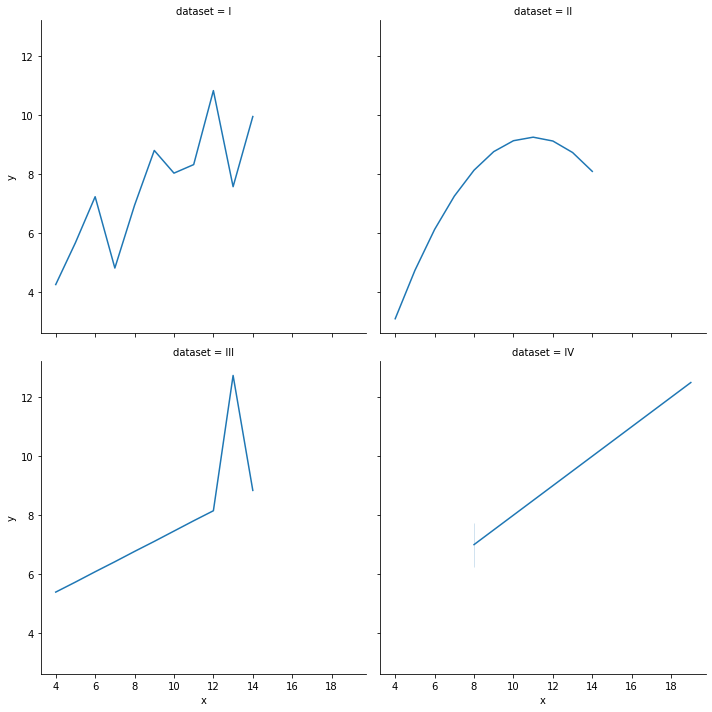

In [41]:
# 1a) Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

sns.relplot(data = anscombe,
           x = 'x',
           y = 'y',
           col = 'dataset',
           kind = 'line',
           col_wrap = 2)

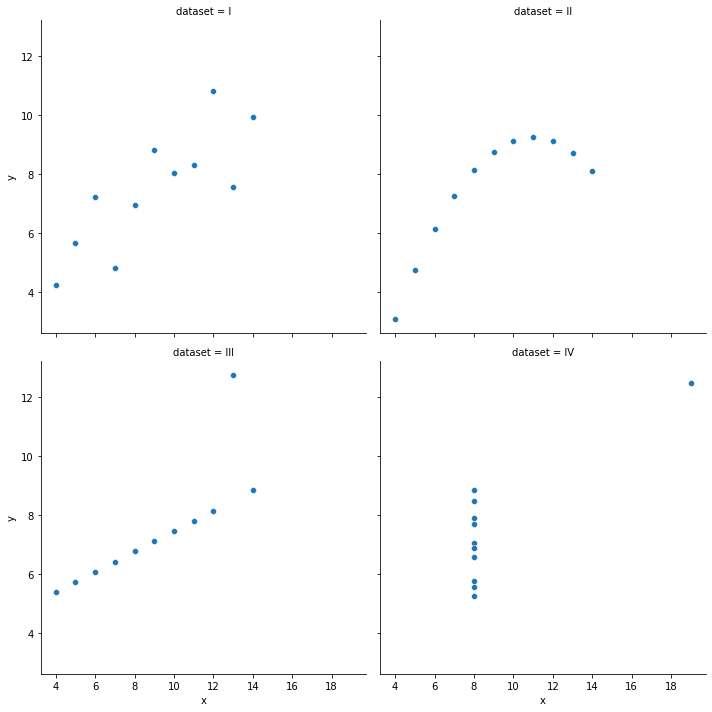

In [42]:
sns.relplot(data = anscombe,
           x = 'x',
           y = 'y',
           col = 'dataset',
           col_wrap = 2)

<AxesSubplot:xlabel='x', ylabel='y'>

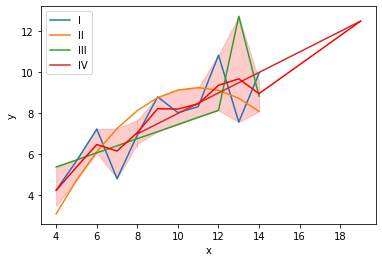

In [43]:
sns.lineplot(data = anscombe,
            x = 'x',
            y = 'y',
            hue = 'dataset')

sns.lineplot(data = anscombe,
            x = 'x',
            y = 'y',
            color = 'r',
            estimator = 'mean')

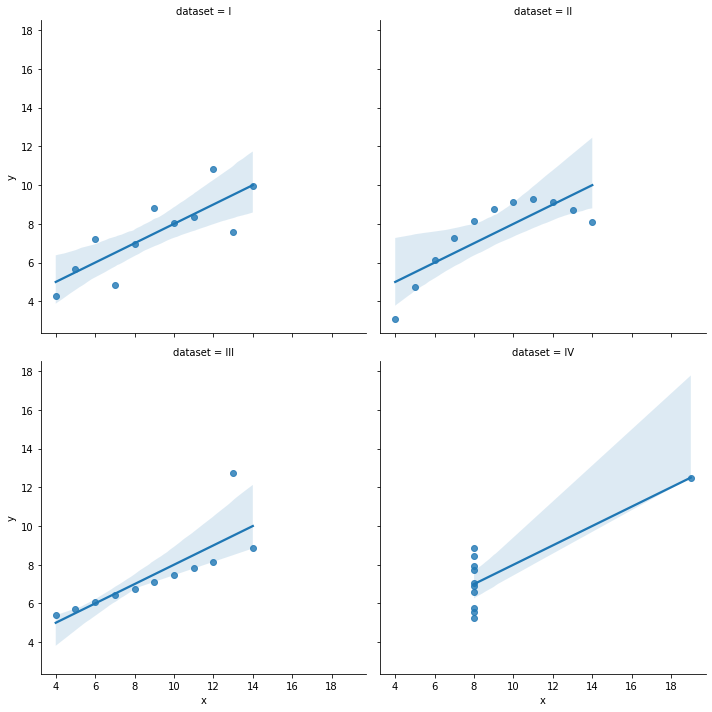

In [44]:
sns.lmplot(data = anscombe,
           x = 'x',
           y = 'y',
           col = 'dataset',
           col_wrap = 2)

#Seaborn's lmplot is a 2D scatterplot with an optional overlaid regression line. This is useful for 
#comparing numeric variables. Logistic regression for binary classification is also supported with lmplot .

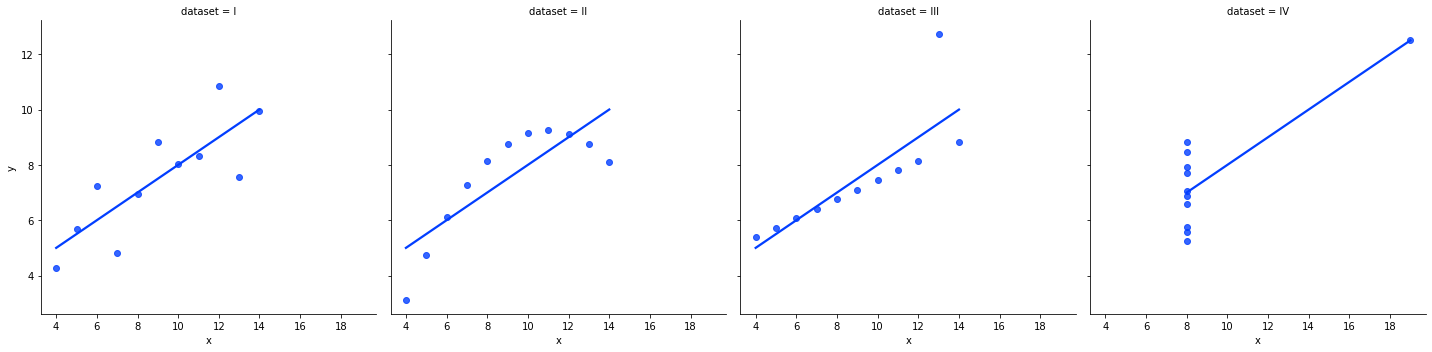

In [81]:
#from review
sns.lmplot(data = anscombe, x = 'x', y = 'y', col = 'dataset', ci = 0)

In [45]:
# 2) Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness 
# of the different insect sprays.

#print(sns.get_dataset_names()) #apparently not a Seaborn dataset

bug_killer = data('InsectSprays')
data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [46]:
bug_killer.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


<AxesSubplot:xlabel='spray', ylabel='count'>

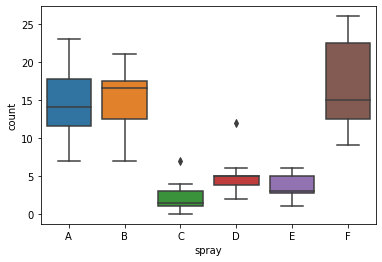

In [47]:
sns.boxplot(data = bug_killer, x = 'spray', y = 'count')

In [48]:
# 3) Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather 
# than seaborn. Create visualizations to answer the following questions:

swiss = data('swiss')
data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [49]:
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [50]:
swiss.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


In [51]:
# 3a)Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. 
# (Choose a cutoff point for what constitutes catholic)
catholic_avg = round(swiss.Catholic.mean(), 2)
catholic_avg 
swiss['is_catholic'] = swiss.Catholic > catholic_avg 
#swiss.drop(columns = ['is_Catholic'])
swiss.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


In [52]:
# 3b) Does whether or not a province is Catholic influence fertility?
## There is some positive correlation between Catholic provinces and fertility, but other factors are a more likely indicator..
swiss.corr(method = 'pearson').Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.275720
Name: Fertility, dtype: float64

In [53]:
s_df = pd.DataFrame(swiss.corr().Fertility, columns = ['Fertility']) #turned the corr series into a df
s_df

,Fertility
Fertility,1.000000
Agriculture,0.353079
Examination,-0.645883
Education,-0.663789
Catholic,0.463685
Infant.Mortality,0.416556
is_catholic,0.275720


In [55]:
swiss.corr().Fertility

Fertility           1.000000
Agriculture         0.353079
Examination        -0.645883
Education          -0.663789
Catholic            0.463685
Infant.Mortality    0.416556
is_catholic         0.275720
Name: Fertility, dtype: float64

<AxesSubplot:>

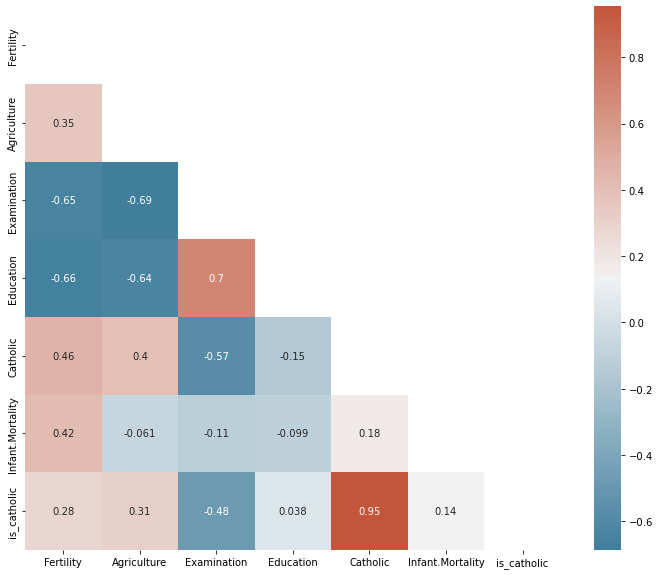

In [56]:
# Correlation between different variables
s_corr = swiss.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize = (12, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(s_corr, dtype = bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap = True)

# Draw the heatmap
sns.heatmap(s_corr, annot = True,
           mask = mask,
           cmap = cmap)

<AxesSubplot:>

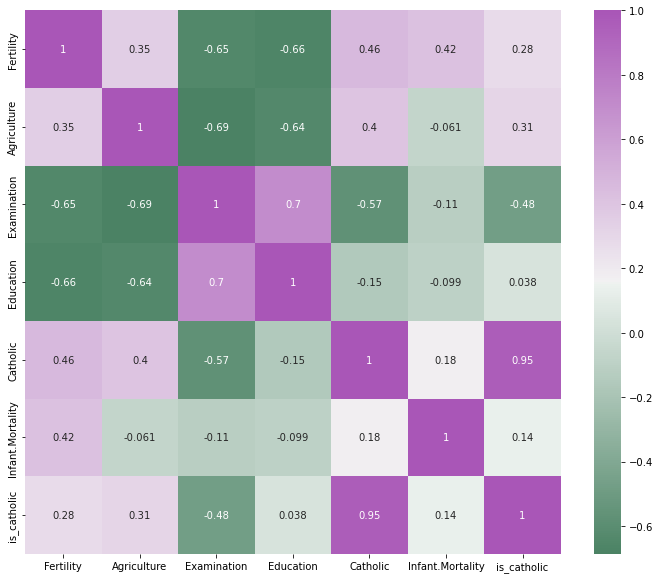

In [57]:
f, ax = plt.subplots(figsize=(12, 10))

cmap2 = sns.diverging_palette(145, 300, s = 60, as_cmap = True)

sns.heatmap(s_corr, annot = True,
           cmap = cmap2)

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

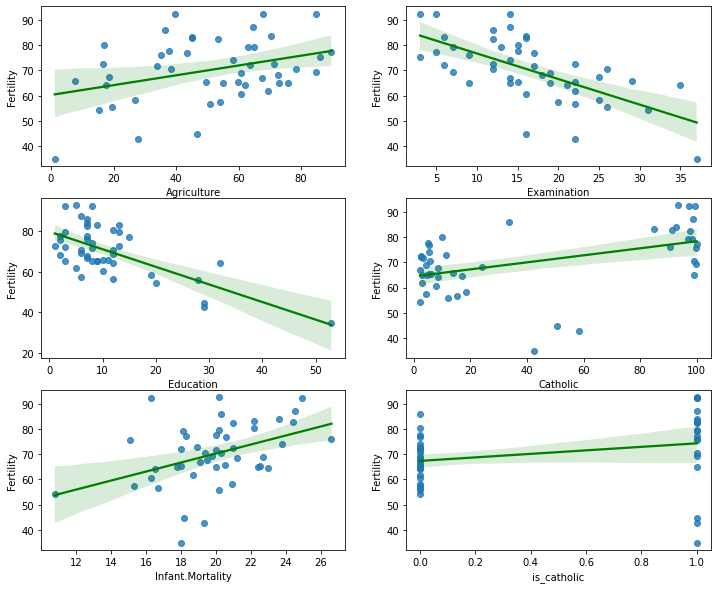

In [58]:
plt.figure(figsize = (12 , 10))

plt.subplot(321)
sns.regplot(data = swiss, x = 'Agriculture', y = 'Fertility', line_kws = {'color' : 'g'})

plt.subplot(322)
sns.regplot(data = swiss, x = 'Examination', y = 'Fertility', line_kws = {'color' : 'g'})

plt.subplot(323)
sns.regplot(data = swiss, x = 'Education', y = 'Fertility', line_kws = {'color' : 'g'})

plt.subplot(324)
sns.regplot(data = swiss, x = 'Catholic', y = 'Fertility', line_kws = {'color' : 'g'})

plt.subplot(325)
sns.regplot(data = swiss, x = 'Infant.Mortality', y = 'Fertility', line_kws = {'color' : 'g'})

plt.subplot(326)
sns.regplot(data = swiss, x = 'is_catholic', y = 'Fertility', line_kws = {'color' : 'g'})

<AxesSubplot:xlabel='is_catholic', ylabel='Fertility'>

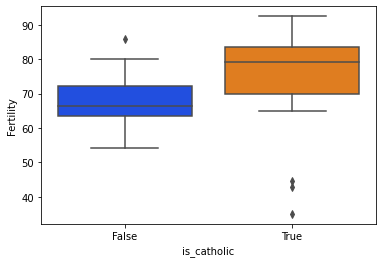

In [83]:
# from review
sns.boxplot(data = swiss, x = 'is_catholic', y = 'Fertility')

#shows that the mean Fertility is higher where provinces are catholic

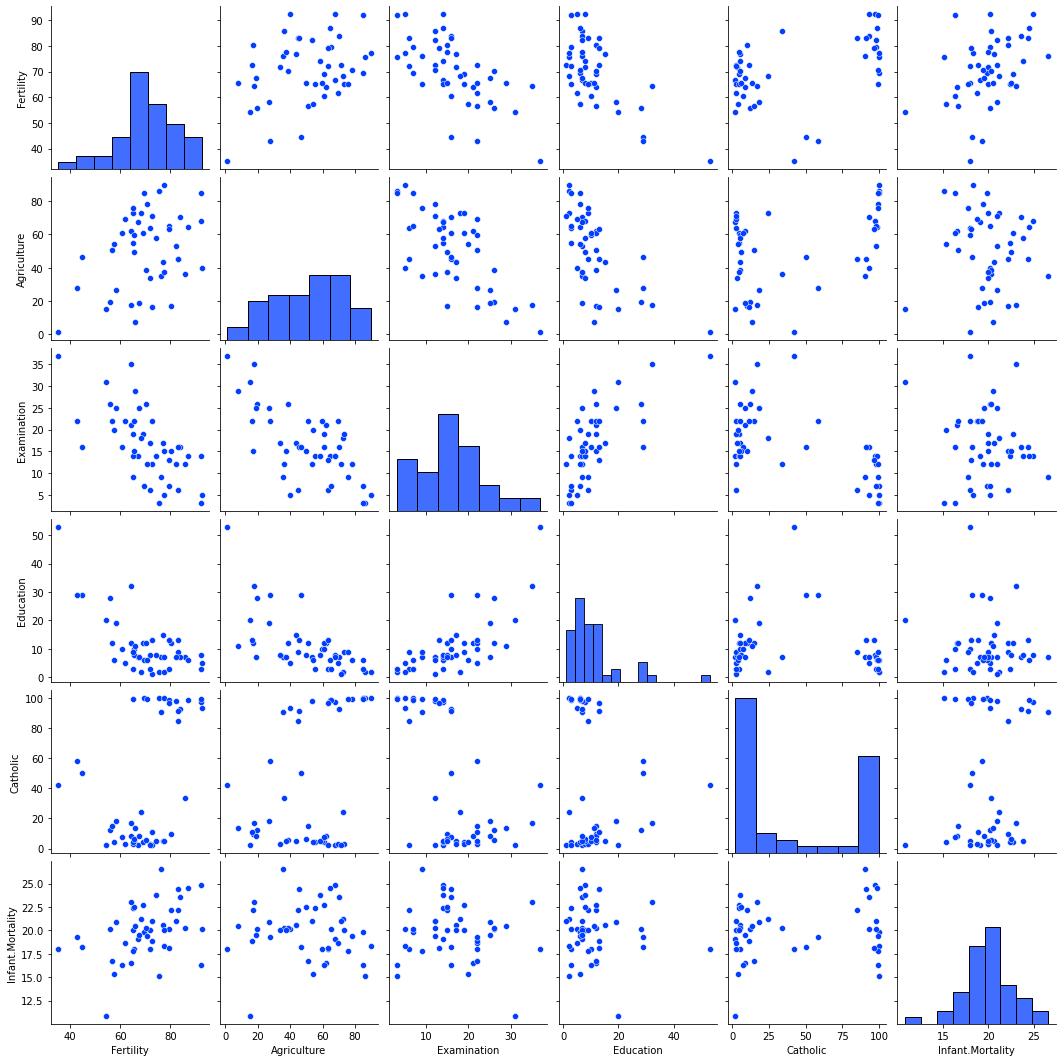

In [84]:
# 3c) What measure correlates most strongly with fertility?

## Education and examination have a strong negative correlation, while Infant Mortality 
# and Catholicism has some positive correlation with Fertility.


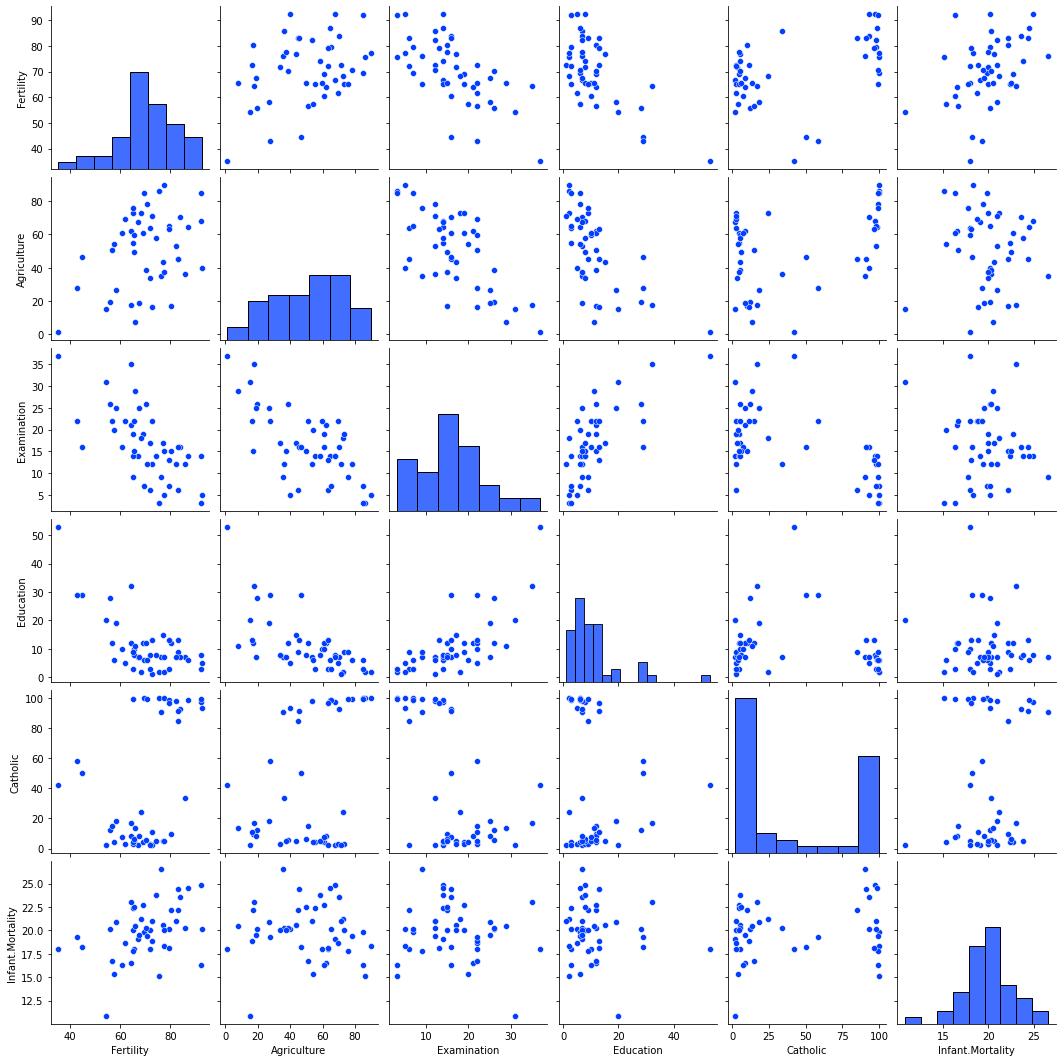

In [94]:
#from review
sns.pairplot(data = swiss.iloc[:, :-1]) #dropped is_catholic column bc its boolean and may skew data using iloc

---

In [60]:
# 4) Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular 
# items and the revenue produced by each.
from env import get_db_url

chipotle = pd.read_sql('SELECT * FROM orders', get_db_url('chipotle'))

chipotle.head(1)

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39


/var/folders/ry/d9b6htx57bx_sj1vtzmy_pbw0000gn/T/ipykernel_2812/2152330562.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle['item_price'] = chipotle['item_price'].str.replace('$', '').astype('float')


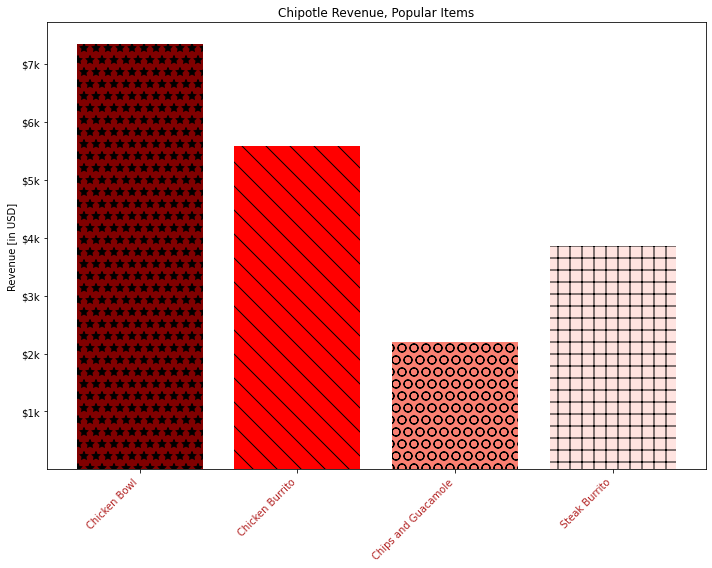

In [67]:
chipotle['item_price'] = chipotle['item_price'].str.replace('$', '').astype('float') #lost all my bars when commented out -_-
#chipotle.head(1)


pop_items = chipotle.groupby('item_name').quantity.sum().sort_values(ascending = False).head(4)

#pop_items are:Chicken Bowl, Chicken Burrito, Steak Burrito, Steak Bowl
pop_items.index
# ---- use pop_items to get the revenue for those items:

pop_rev = chipotle[chipotle.item_name.isin(pop_items.index)].groupby('item_name').item_price.sum()
pop_rev
#highest_rev = chipotle.groupby('item_name').item_price.sum().sort_values(ascending = False).head(4)
#highest_rev

plt.figure(figsize = (10, 8))
patterns = ('*', '\\', 'O', '+')
bars = plt.bar(pop_rev.index, pop_rev, color = ['maroon', 'red', 'salmon', 'mistyrose'])

for i, x in zip(bars, patterns):
    i.set_hatch(x) 

plt.xticks(color = 'firebrick', rotation = 45, horizontalalignment = 'right')

plt.title('Chipotle Revenue, Popular Items')
plt.ylabel('Revenue [in USD]')
plt.yticks([1000, 2000, 3000, 4000 , 5000 , 6000 , 7000 ] , ['$1k' , '$2k' , '$3k' , '$4k', '$5k' , '$6k' , '$7k'])
#pop_items.plot(kind = 'bar',
#              color = 'r',
#              ec = 'black',
#              width = 0.7)

plt.tight_layout()

In [62]:
# 5) Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the 
# individual subject's reaction times and a more prominant line showing the average change in reaction time.

sleepstudy = data('sleepstudy')
data('sleepstudy', show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [68]:
sleepstudy.head(5)

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [69]:
sleepstudy.shape

(180, 3)

In [70]:
sleepstudy.value_counts('Subject')

Subject
308    10
309    10
371    10
370    10
369    10
352    10
351    10
350    10
349    10
337    10
335    10
334    10
333    10
332    10
331    10
330    10
310    10
372    10
dtype: int64

In [71]:
len(sleepstudy.value_counts('Subject'))

18

In [93]:
sleepstudy.dtypes #Subject is an object, must change into a string.

Reaction    float64
Days          int64
Subject      object
dtype: object

In [72]:
# w/o turning the column into a string, all lines show but don't show in legend, 
#and lines that show in legend are misnumbered, why? 

    #From review, it's because Subject was an interger, the color 
#assigned is sequential (light purple 
# to dark purple because the numbers are close to each other)

sleepstudy['Subject'] = 'Subject ' + sleepstudy.Subject.astype(str) 

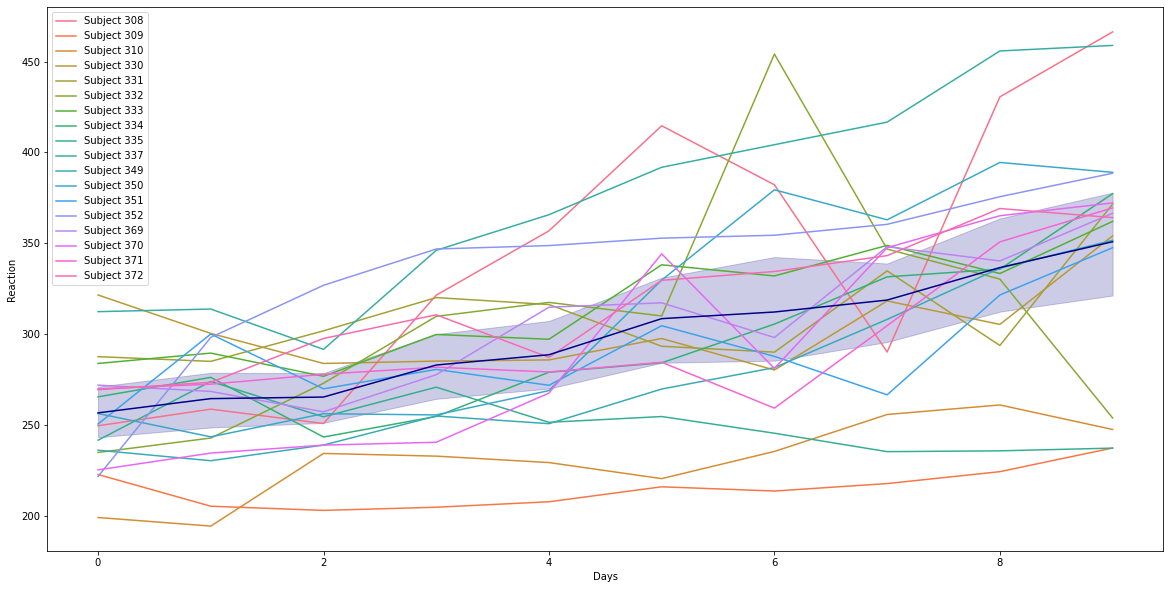

In [73]:
#color_is = sns.cubehelix_palette(as_cmap=True)
cstmclr = sns.set_palette('bright')
plt.figure(figsize = (20, 10))
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', hue = 'Subject', color = cstmclr)
sns.lineplot(data = sleepstudy, x = 'Days', y = 'Reaction', color = 'darkblue', estimator = 'mean' ) #aggregate line
plt.legend(loc = 'upper left', fontsize = 10)
